# Automated graphics on the evolution of the Covid 19 in France

## Data processing 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['figure.figsize'] = (12, 9) 
pd.options.mode.chained_assignment = None #not reporting potentially confusing "chained" assignments

Database import

In [2]:
df_url =  "https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7"
df = pd.read_csv(df_url,  sep=";")
df.head()

,dep,sexe,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
0,01,0,2020-03-18,2,0,NaN,NaN,NaN,1,0
1,01,1,2020-03-18,1,0,NaN,NaN,NaN,1,0
2,01,2,2020-03-18,1,0,NaN,NaN,NaN,0,0
3,02,0,2020-03-18,41,10,NaN,NaN,NaN,18,11
4,02,1,2020-03-18,19,4,NaN,NaN,NaN,11,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201605 entries, 0 to 201604
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   dep       201605 non-null  object 
 1   sexe      201605 non-null  int64  
 2   jour      201605 non-null  object 
 3   hosp      201605 non-null  int64  
 4   rea       201605 non-null  int64  
 5   HospConv  91500 non-null   float64
 6   SSR_USLD  91500 non-null   float64
 7   autres    91500 non-null   float64
 8   rad       201605 non-null  int64  
 9   dc        201605 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 15.4+ MB


In [4]:
df = df[['dep','sexe','jour', 'hosp' ,'rea', 'dc']]
df.head()

,dep,sexe,jour,hosp,rea,dc
0,01,0,2020-03-18,2,0,0
1,01,1,2020-03-18,1,0,0
2,01,2,2020-03-18,1,0,0
3,02,0,2020-03-18,41,10,11
4,02,1,2020-03-18,19,4,6


In [5]:
df_1 = df.copy()

df_1 = df_1.groupby(by="jour").sum().reset_index()

df_1["décès"] = df_1["dc"] - df_1["dc"].shift()
df_1 = df_1.dropna()
df_1.rename(columns={"dc": "décès_total"}, inplace = True)
df_1["décès_total"] = df_1["décès_total"].astype('int64')

df_2 = df_1.copy()
df_2 = df_2.set_index("jour")

In [6]:
df_2.head(5)

,sexe,hosp,rea,décès_total,décès
jour,,,,,
2020-03-19,304,7961,1975,642,207.0
2020-03-20,304,10272,2564,890,248.0
2020-03-21,304,11599,2872,1041,151.0
2020-03-22,304,13675,3311,1251,210.0
2020-03-23,304,17087,4114,1707,456.0


## Graphics 

Text(0.5, 1.0, 'Décès Covid 19')

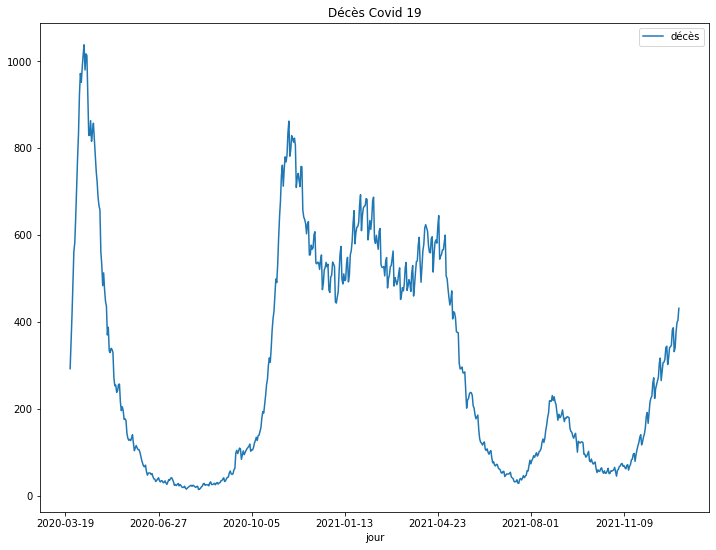

In [7]:
MA_décès =df_2[['décès']]
MA_décès.rolling(6).mean().plot()
plt.title('Décès Covid 19')

Text(0.5, 1.0, 'Hospitalisations Covid 19')

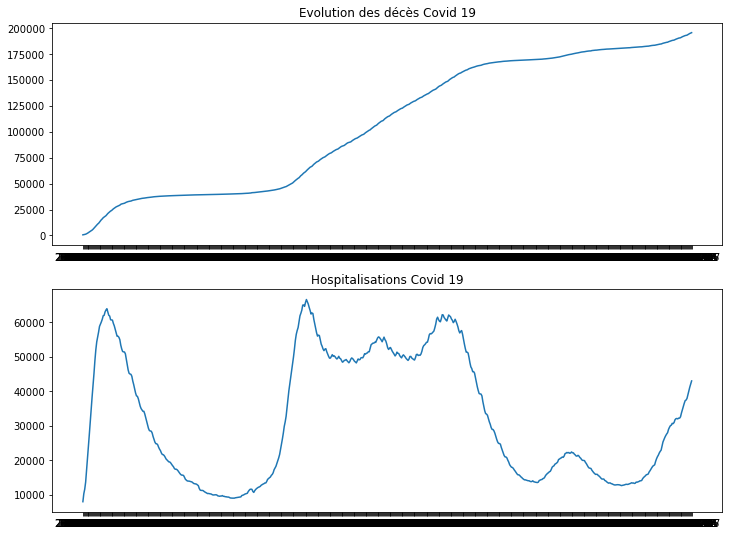

In [8]:
plt.subplot(2,1,1)
plt.plot(df_2['décès_total'])
plt.title('Evolution des décès Covid 19')

plt.subplot(2,1,2)
plt.plot( df_2['hosp'])
plt.title('Hospitalisations Covid 19')